In [1]:

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


Using TensorFlow backend.


In [2]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 120
validation_samples = 30
epochs = 10
batch_size = 20

input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:

import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [5]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 198 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'burger': 0, 'pizza': 1}


In [16]:
imgs, labels = next(train_generator)

In [17]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


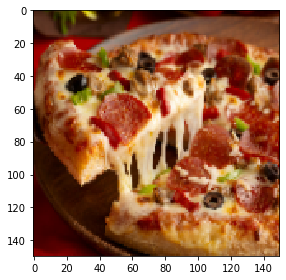

0.0


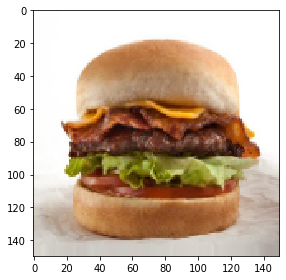

1.0


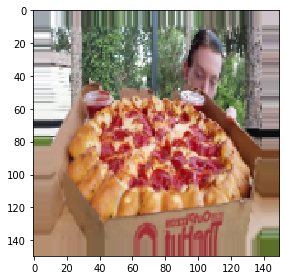

0.0


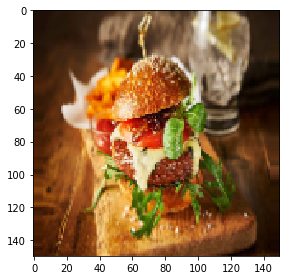

0.0


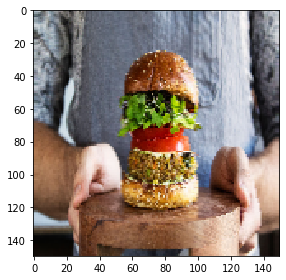

0.0


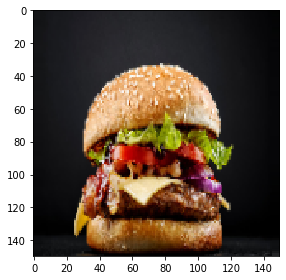

0.0


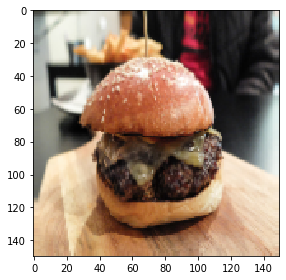

0.0


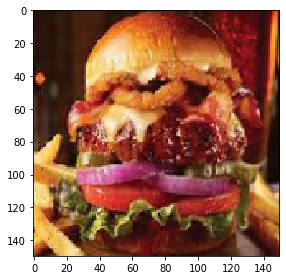

0.0


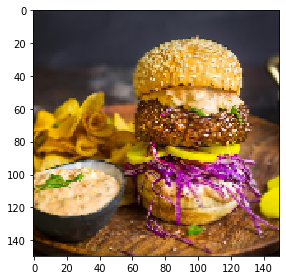

1.0


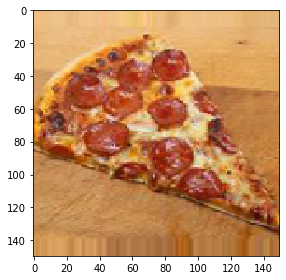

1.0


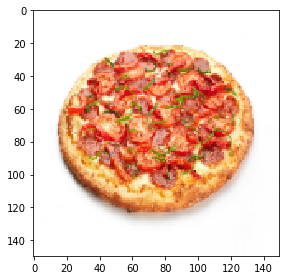

1.0


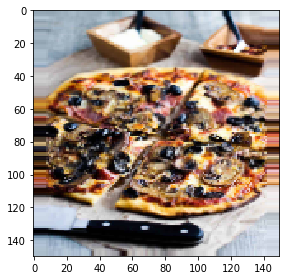

0.0


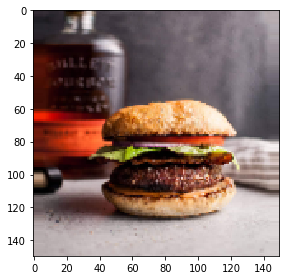

1.0


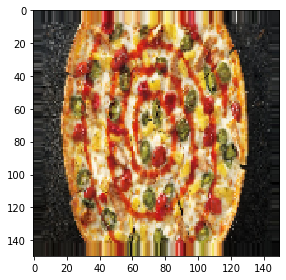

1.0


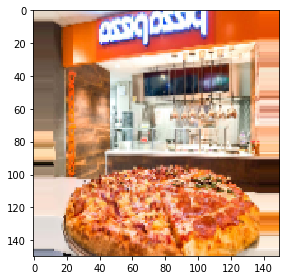

0.0


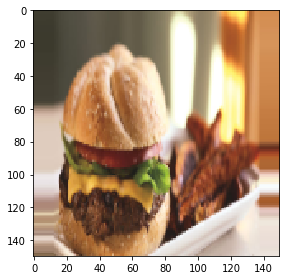

1.0


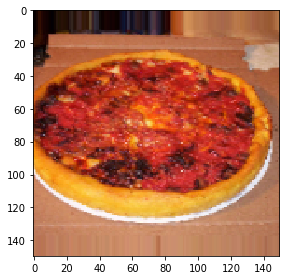

1.0


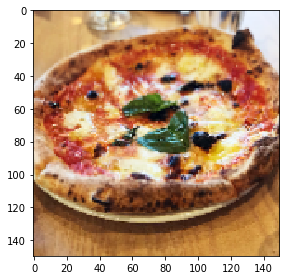

1.0


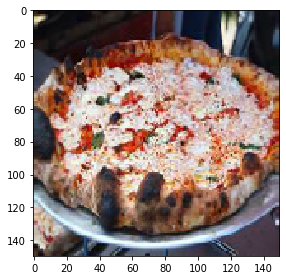

1.0


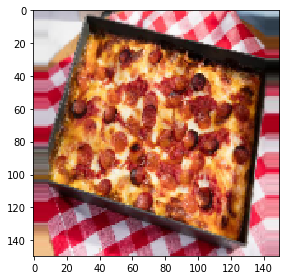

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [19]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 0.5679 - accuracy: 0.7500 - val_loss: 0.4493 - val_accuracy: 0.9500
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 0.5328 - accuracy: 0.7627 - val_loss: 0.5547 - val_accuracy: 0.7000
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.5481 - accuracy: 0.7373 - val_loss: 0.4764 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 15s 3s/step - loss: 0.5089 - accuracy: 0.8000 - val_loss: 0.3821 - val_accuracy: 0.8500
Epoch 5/10
6/6 [==============================] - 15s 3s/step - loss: 0.5163 - accuracy: 0.7627 - val_loss: 0.5188 - val_accuracy: 0.7500
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.4673 - accuracy: 0.8417 - val_loss: 0.3291 - val_accuracy: 0.9500
Epoch 7/10
6/6 [==============================] - 12s 2s/step - loss: 0.4279 - accuracy: 0.8305 - val_loss: 0.4045 - val_accuracy: 0.8500
Epoch 8/10
6/6 [==================

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


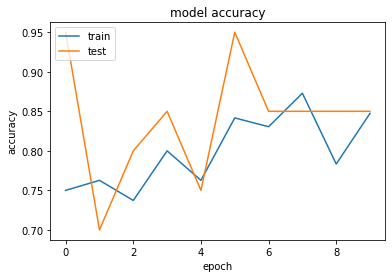

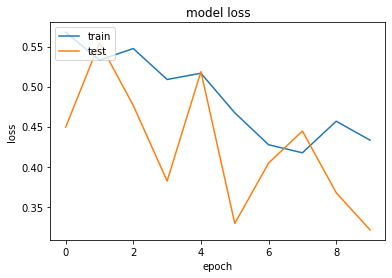

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1.jpg', '2.jpg', '4.jpg', '5.jpg']


In [23]:
from keras.preprocessing import image
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    
    if classes == 0:
        print(file + ": " + 'burger')
       
    else:
        print(file + ": " + 'pizza')
      

1.jpg: burger
2.jpg: pizza
4.jpg: burger
5.jpg: pizza
